In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.utils import Bunch
import pandas as pd

dataset: Bunch = fetch_california_housing()
df: pd.DataFrame = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["HousePrice"] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


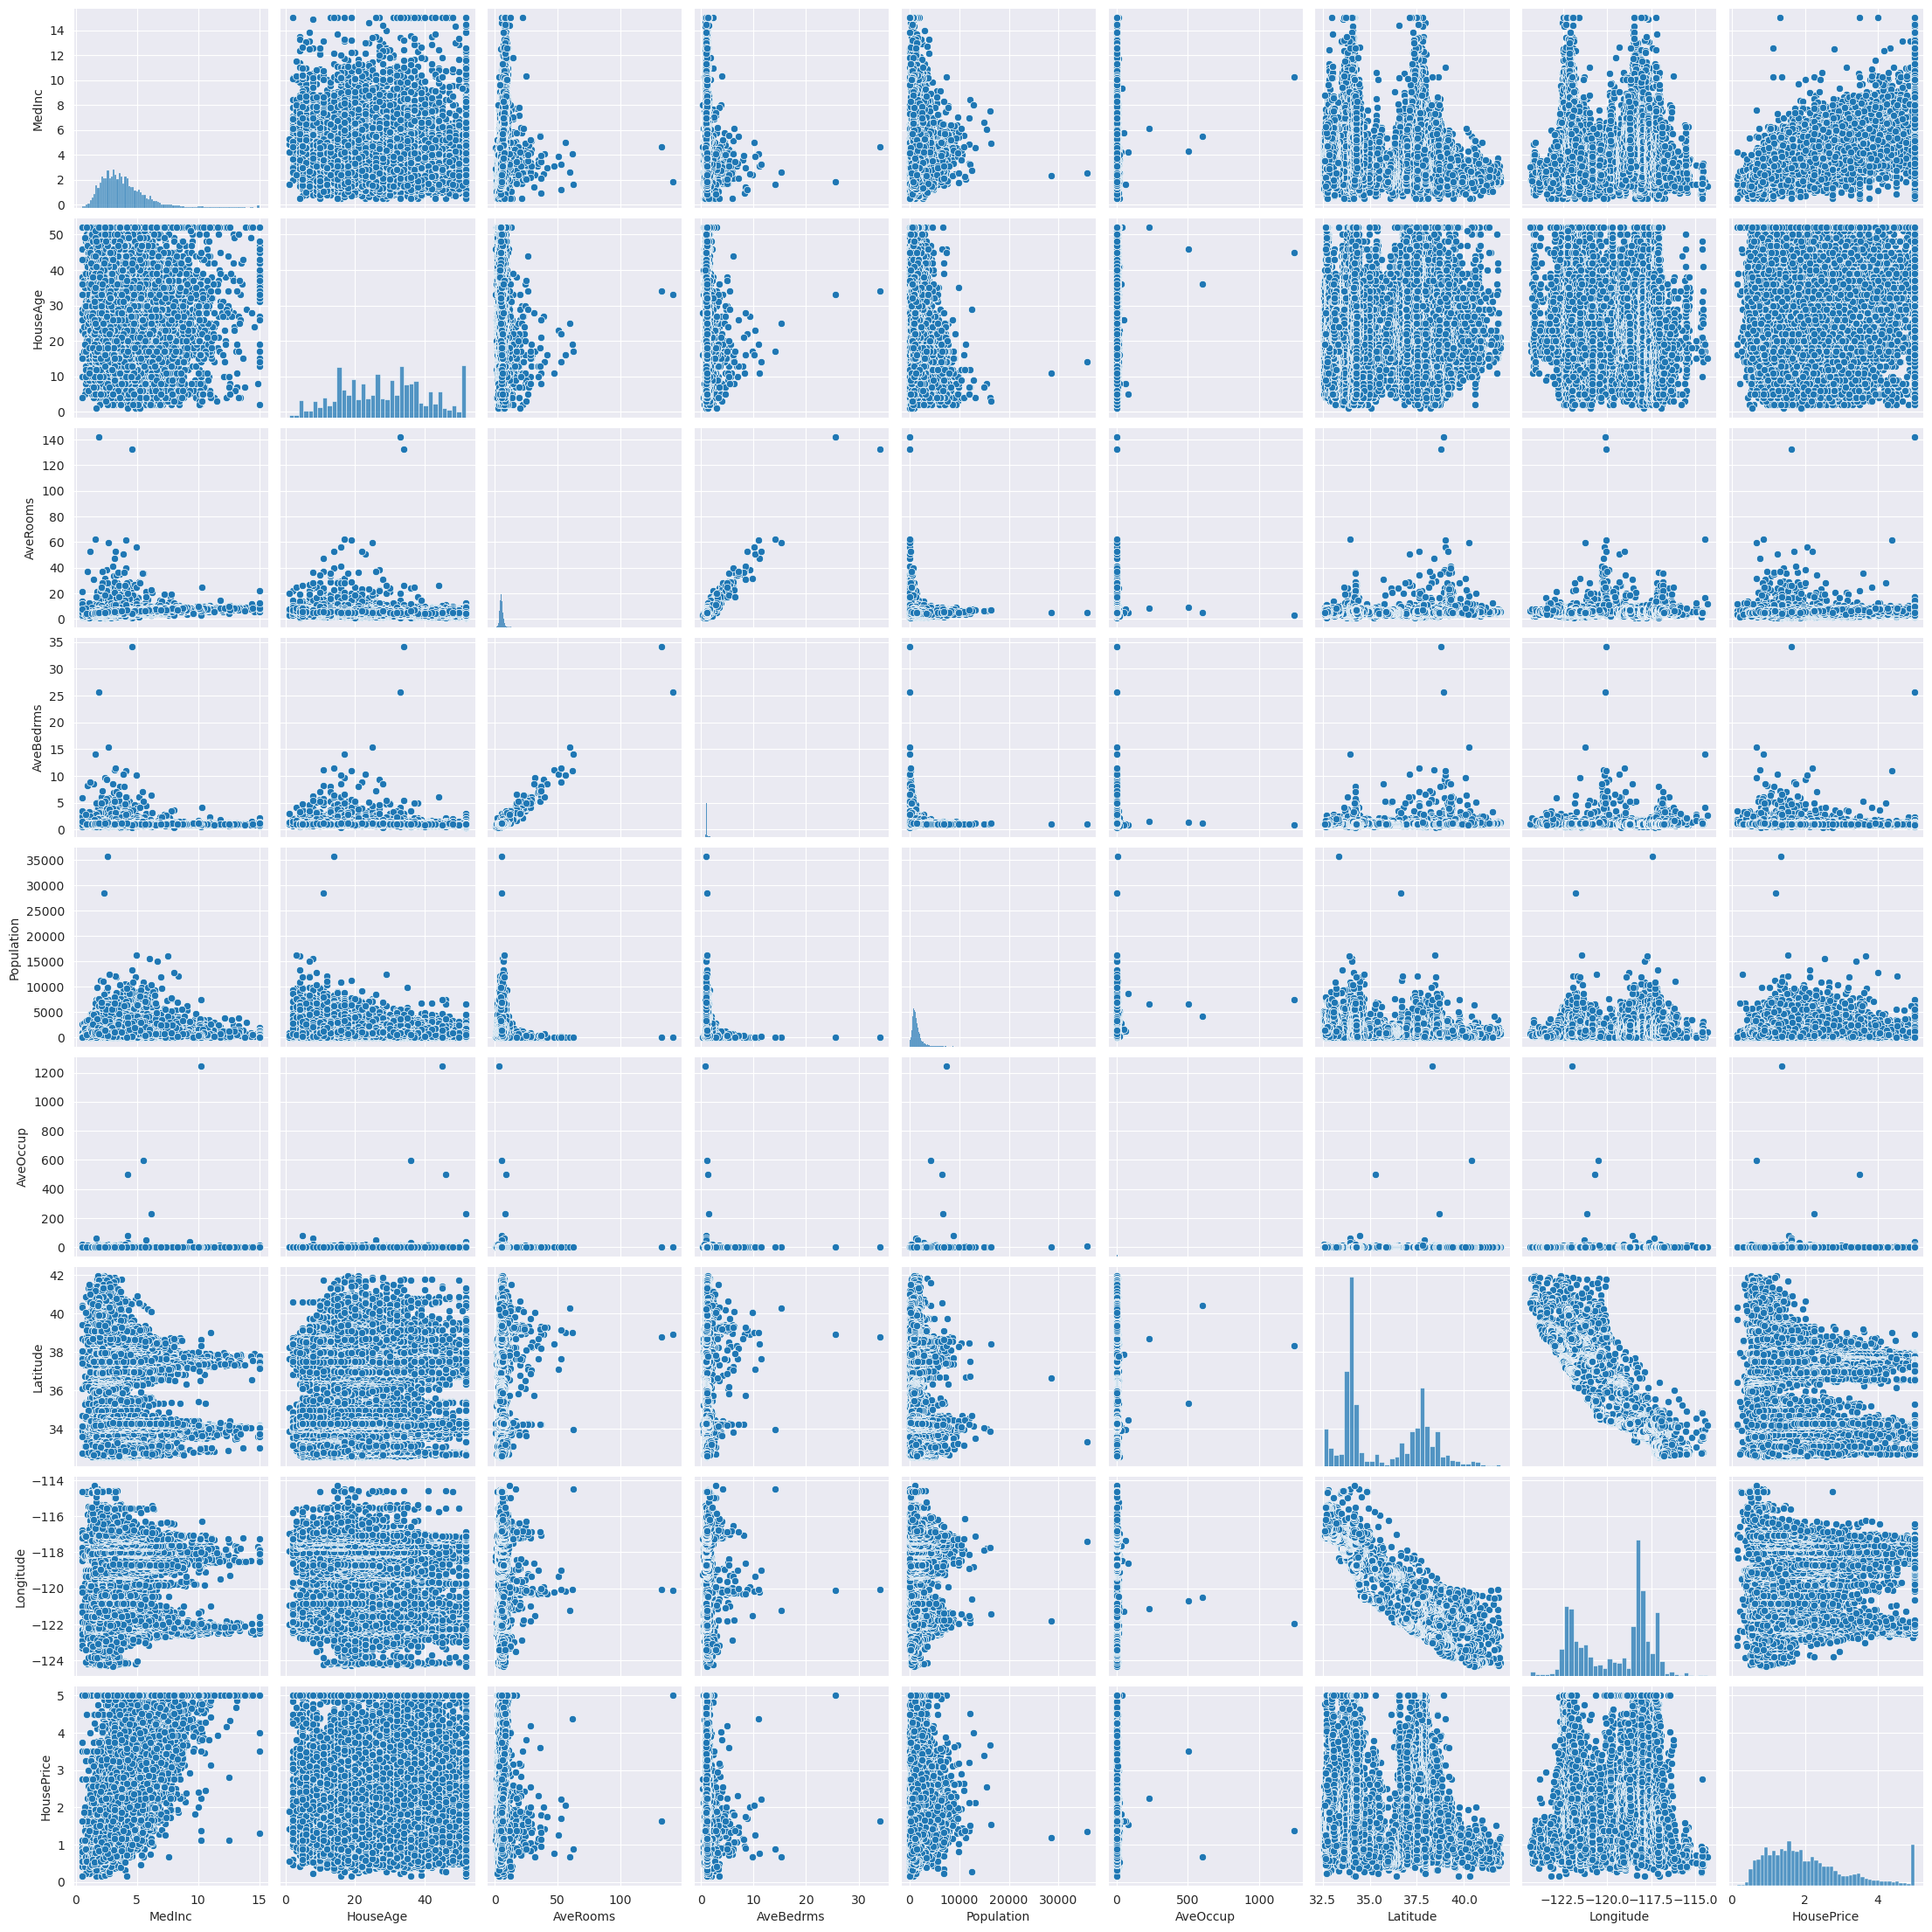

In [2]:
import seaborn as sns
sns.pairplot(df)

<Axes: xlabel='MedInc', ylabel='HousePrice'>

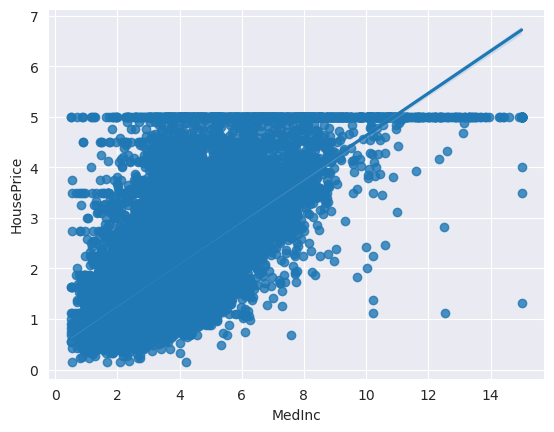

In [3]:
sns.regplot(x="MedInc", y="HousePrice", data=df)

In [4]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
HousePrice,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [5]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

In [6]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

# standardize
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std: pd.DataFrame = scaler.transform(x_train)
x_test_std: pd.DataFrame = scaler.transform(x_test)

# predict with linear regression
linear_regression = LinearRegression()
linear_regression.fit(x_train_std, y_train)

predictions: np.ndarray = linear_regression.predict(x_test_std)
r2 = r2_score(y_test, predictions)
print(f'R2: {r2:.2f}')
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae:.2f}')
print(f'Coefficients: {linear_regression.coef_}')
print(f'Intercept: {linear_regression.intercept_}')

R2: 0.58
MAE: 0.53
Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Intercept: 2.0719469373788777


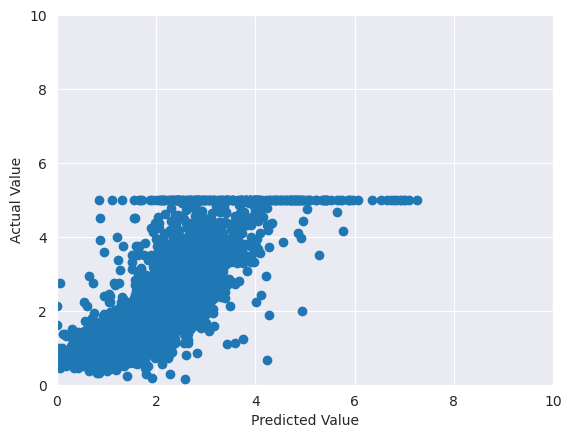

In [7]:
import matplotlib.pyplot as plt

plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.scatter(predictions, y_test)